# Analisi dello stato generale di monitoraggio del virus Covid-19.

## In questo notebook presentiamo alcuni stumenti e statistiche effettuate sul monitoraggio del virus.

### Autori
- Dalila Failli
        mail: dalila.failli@stud.unifi.it 
        corso di Laurea Magistrale in Statistica e Data Science
- Lorenzo Pratesi Mariti
        mail: lorenzo.pratesi@stud.unifi.it
        corso di Laurea Magistrale in Informatica

### Dataset
I dati utilizzati in questo notebook sono disponibili al seguente indirizzo https://github.com/pcm-dpc/COVID-19. 

In particolare verranno utilizzati due dataset:
-    **dpc-covid19-ita-regioni.json**
-    **dpc-covid19-ita-province.json**

Per eseguire correttamente il seguente notebook sono necessari i seguenti moduli:
- `pandas`
- `numpy`
- `matplotlib`

### Importiamo i moduli

In [1]:
# useful imports
import numpy as np
import pandas as pd

# useful for displaying html, images and so on
import re #regular expression
from IPython.display import display, Markdown
import markdown
from datetime import datetime, timedelta

# plotting
import matplotlib
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.dates as mdates
import altair as alt #plot data

## Familiarizzamo con i dati 
### Struttura del repository


In [2]:
from urllib.request import urlopen

readme = urlopen("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/README.md").read().decode('utf=8')
repository_structure = readme.partition("## Struttura del repository\n")[2].partition("##")[0] 

display(Markdown(repository_structure))

```
COVID-19/
│
├── aree/
│   ├── geojson
│   │   ├── dpc-covid-19-ita-aree-comuni.geojson
│   │   ├── dpc-covid19-ita-aree.geojson
│   ├── shp
│   │   ├── dpc-covid19-ita-aree-comuni.dbf
│   │   ├── dpc-covid19-ita-aree-comuni.prj
│   │   ├── dpc-covid19-ita-aree-comuni.shp
│   │   ├── dpc-covid19-ita-aree-comuni.shx
│   │   ├── dpc-covid19-ita-aree.dbf
│   │   ├── dpc-covid19-ita-aree.prj
│   │   ├── dpc-covid19-ita-aree.shp
│   │   ├── dpc-covid19-ita-aree.shx
├── dati-andamento-nazionale/
│   ├── dpc-covid19-ita-andamento-nazionale-*.csv
│   ├── dpc-covid19-ita-andamento-nazionale-latest.csv
│   ├── dpc-covid19-ita-andamento-nazionale.csv
├── dati-contratti-dpc-forniture/
│   ├── dpc-covid19-dati-contratti-dpc-forniture.csv
│   ├── dpc-covid19-dati-pagamenti-contratti-dpc-forniture.csv
│   ├── dati-json
│   │   ├── dpc-covid19-dati-contratti-dpc-forniture.csv
│   │   ├── dpc-covid19-dati-pagamenti-contratti-dpc-forniture.csv
│   ├── file-atti-negoziali
│   │   ├── dpc-contratto-covid19-*.pdf
├── dati-json/
│   ├── dpc-covid19-ita-andamento-nazionale-latest.json
│   ├── dpc-covid19-ita-andamento-nazionale.json
│   ├── dpc-covid19-ita-note-en.json
│   ├── dpc-covid19-ita-note-it.json
│   ├── dpc-covid19-ita-province-latest.json
│   ├── dpc-covid19-ita-province.json
│   ├── dpc-covid19-ita-regioni-latest.json
│   ├── dpc-covid19-ita-regioni.json
├── dati-province/
│   ├── dpc-covid19-ita-province-*.csv
│   ├── dpc-covid19-ita-province-latest.csv
│   ├── dpc-covid19-ita-province.csv
├── dati-regioni/
│   ├── dpc-covid19-ita-regioni-*.csv
│   ├── dpc-covid19-ita-regioni-latest.csv
│   ├── dpc-covid19-ita-regioni.csv
├── legacy/
│   ├── dati-andamento-nazionale
│   ├── dati-json
│   ├── dati-province
│   ├── dati-regioni
├── metriche
│   ├── dpc-covid19-ita-metriche-dashboard-desktop.csv
│   ├── dpc-covid19-ita-metriche-dashboard-desktop.json
│   ├── dpc-covid19-ita-metriche-dashboard-mobile.csv
│   ├── dpc-covid19-ita-metriche-dashboard-mobile.json
├── note/
│   ├── dpc-covid19-ita-note-en.csv
│   ├── dpc-covid19-ita-note-it.csv
├── schede-riepilogative/
│   ├── province
│   │   ├── dpc-covid19-ita-scheda-province-*.pdf
│   ├── regioni
│   │   ├── dpc-covid19-ita-scheda-regioni-*.pdf
```



Come possiamo vedere dall'albero risultante ci sono molti dataset con cui poter intraprendere un lavoro di analisi. Per il momento ci soffermeremo sul dataset generale **dpc-covid19-ita-andamento-nazionale.json**, il quale contiene l'elenco costantemente aggiornato giorno per giorno dello stato di avanzamento del virus. 

Successivamente verranno analizzati in maniera più dettagliata i due dataset esposti in precedenza. 

### Andamento e situazione generale
Utilizzando il dataset **dpc-covid19-ita-andamento-nazionale.json** costruiamo l'andamento generale delle persone contagiate da covid-19.

In [3]:
# confirmed infections url
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json"
conf_df = pd.read_json(url)

# fixed country
confirmed = conf_df[['totale_casi', 'nuovi_positivi']].copy()
confirmed.columns = ['cumulative', 'daily']
FMT = '%Y-%m-%dT%H:%M:%S' #datetime format
confirmed.index = conf_df['data'].apply(lambda x: datetime.strptime(x, FMT)) #creates a datetime object from the given string
confirmed

cumulative  daily
data                                  
2020-02-24 18:00:00         229    221
2020-02-25 18:00:00         322     93
2020-02-26 18:00:00         400     78
2020-02-27 18:00:00         650    250
2020-02-28 18:00:00         888    238
...                         ...    ...
2020-07-08 17:00:00      242149    193
2020-07-09 17:00:00      242363    229
2020-07-10 17:00:00      242639    276
2020-07-11 17:00:00      242827    188
2020-07-12 17:00:00      243061    234

[140 rows x 2 columns]

#### Periodo di osservazione e di raccolta dei dati

In [4]:
period = (
    datetime.strptime(conf_df["data"].iloc[-1], "%Y-%m-%dT%H:%M:%S") -  
    datetime.strptime(conf_df["data"].iloc[0], "%Y-%m-%dT%H:%M:%S")
).days

coverage_df = pd.DataFrame(columns=['FIRST ENTRY DATE','LAST ENTRY DATE', 'COVERAGE'])
coverage_df.loc[0] = [conf_df["data"].iloc[0]] + [conf_df["data"].iloc[-1]] + [period]
coverage_df['FIRST ENTRY DATE'] = pd.to_datetime(coverage_df["FIRST ENTRY DATE"])
coverage_df['LAST ENTRY DATE'] = pd.to_datetime(coverage_df["LAST ENTRY DATE"])

print("First entry date: {}".format(coverage_df['FIRST ENTRY DATE'][0]))
print("Last entry date: {}".format(coverage_df['LAST ENTRY DATE'][0]))
print("Coverage: {} days".format(period))

coverage_df

First entry date: 2020-02-24 18:00:00
Last entry date: 2020-07-12 17:00:00
Coverage: 138 days


FIRST ENTRY DATE     LAST ENTRY DATE COVERAGE
0 2020-02-24 18:00:00 2020-07-12 17:00:00      138

#### Andamento giornaliero dei contagi
Costruiamo un grafico per l'andamento giornaliero dei contagi suddividendo la regione del grafico nelle due rispettive **Fasi** del decreto attuato:
   - **Fase 1**:  09/03 - 03/05, Lockdown;
   - **Fase 2**:  04/05 - 14/06, Allentamento delle misure di contenimento.
   - **Fase 3**:  15/06 - in corso, Convivenza con il COVID-19.

https://it.wikipedia.org/wiki/Pandemia_di_COVID-19_del_2020_in_Italia

In [5]:
# set dates for 'fase' 1 and 2.
fase_1 = pd.Timestamp('2020-03-09')
fase_2 = pd.Timestamp('2020-05-04')
fase_3 = pd.Timestamp('2020-06-15')

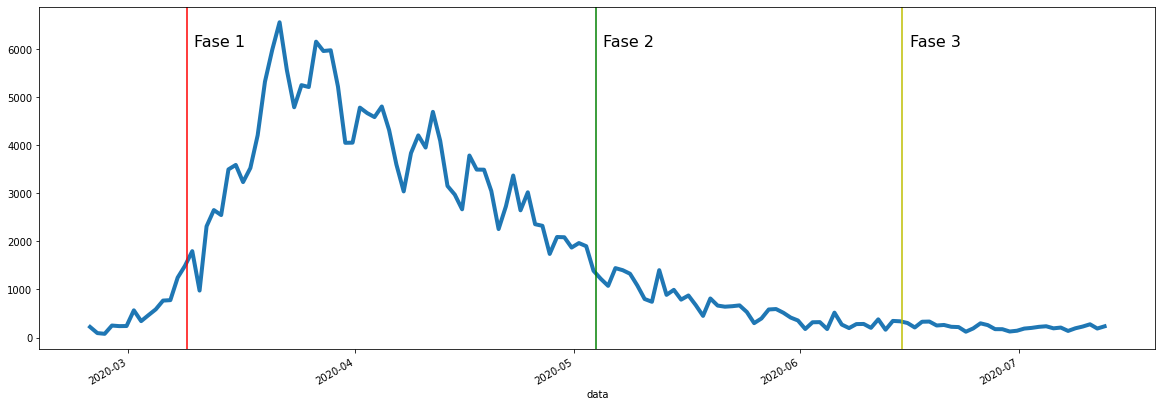

In [6]:
confirmed['daily'].plot(figsize=[20, 7], lw=4)

# just for correctly displaying labels on top of the plot
textY = confirmed['daily'].max() - 500

# vertical line corresponding to the beginning of restriction laws (Fase 1).
plt.axvline(fase_1, color='r')
plt.text(fase_1 + pd.offsets.Day(1), textY, 'Fase 1', fontsize=16)

# vertical line corresponding to the beginning of restriction laws (Fase 2).
plt.axvline(fase_2, color='g')
plt.text(fase_2 + pd.offsets.Day(1), textY, 'Fase 2', fontsize=16)

# vertical line corresponding to the beginning of restriction laws (Fase 3).
plt.axvline(fase_3, color='y')
plt.text(fase_3 + pd.offsets.Day(1), textY, 'Fase 3', fontsize=16)

plt.show()

Possiamo notare un notevole incremento dei contagi in corrispondenza della fase 1 e una successiva riduzione in corrispondenza della fase 2, conseguentemente alle misure adottate dal Governo durante il lockdown.

#### Andamento cumulato e giornaliero dei contagi

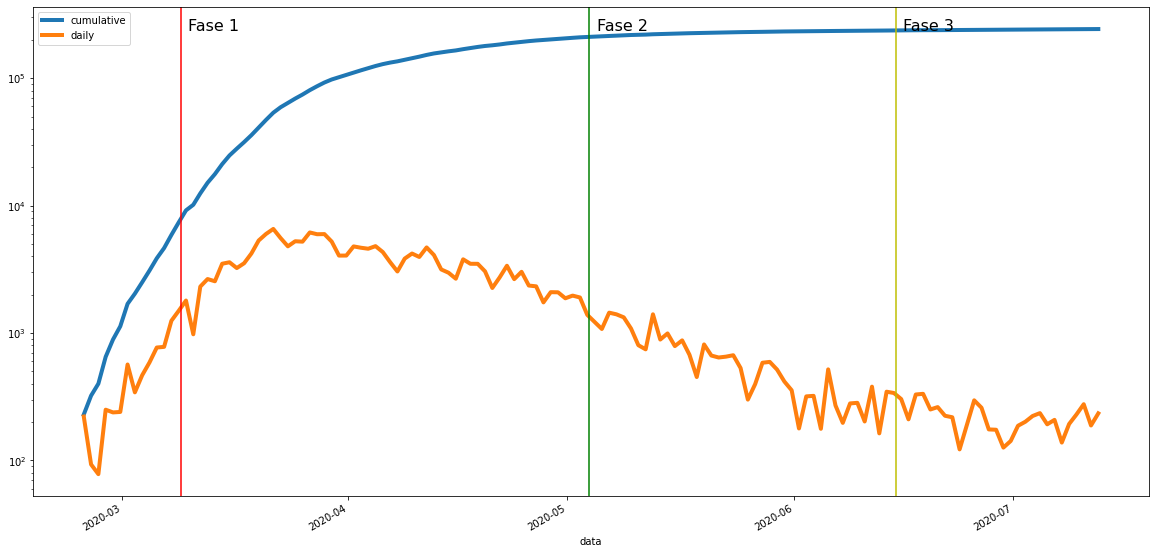

In [7]:
confirmed[['cumulative', 'daily']].plot(figsize=[20, 10], lw=4)

# just for correctly displaying labels on top of the plot
textY = confirmed['cumulative'].max() - 5000

# vertical line corresponding to the beginning of restriction laws (Fase 1). 
plt.axvline(fase_1, color='r')
plt.text(fase_1 + pd.offsets.Day(1), textY, 'Fase 1', fontsize=16)

# vertical line corresponding to the beginning of restriction laws (Fase 2).
plt.axvline(fase_2, color='g')
plt.text(fase_2 + pd.offsets.Day(1), textY, 'Fase 2', fontsize=16)

# vertical line corresponding to the beginning of restriction laws (Fase 3).
plt.axvline(fase_3, color='y')
plt.text(fase_3 + pd.offsets.Day(1), textY, 'Fase 3', fontsize=16)
plt.yscale('log')

plt.show()

Dai grafici sopra esposti è possibile constatare che il numero giornaliero di persone contagiate è in netto calo rispetto all'andamento iniziale.

In particolare, notiamo che il numero massimo giornaliero di persone contagiate si è ottenuto in data **21 marzo 2020**.

In [8]:
pd.DataFrame(confirmed.loc[confirmed['daily'].idxmax()]).tail(1)

2020-03-21 17:00:00
daily                 6557

Facciamo un report generale della situazione nazionale dividendo il dataset in
 - deceduti
 - dimessi guariti
 - totale positivi

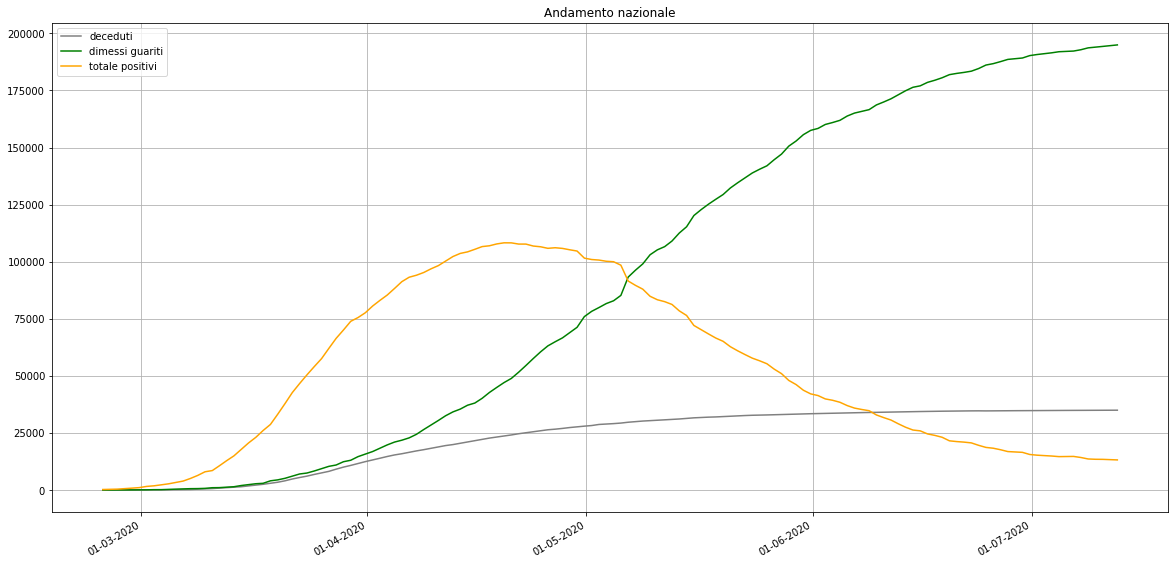

In [9]:
fig = plt.figure(figsize=(20, 10))
x_axis = conf_df['data'].apply(lambda x: datetime.strptime(x, FMT))

plt.plot(x_axis, conf_df['deceduti'], color='gray', label='deceduti')
plt.plot(x_axis, conf_df['dimessi_guariti'], color='green', label='dimessi guariti')
plt.plot(x_axis, conf_df['totale_positivi'], color='orange', label='totale positivi')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()  # Rotation
plt.legend(loc='upper left')
plt.title('Andamento nazionale')

plt.grid()
plt.show()

#### Variazione totale positivi

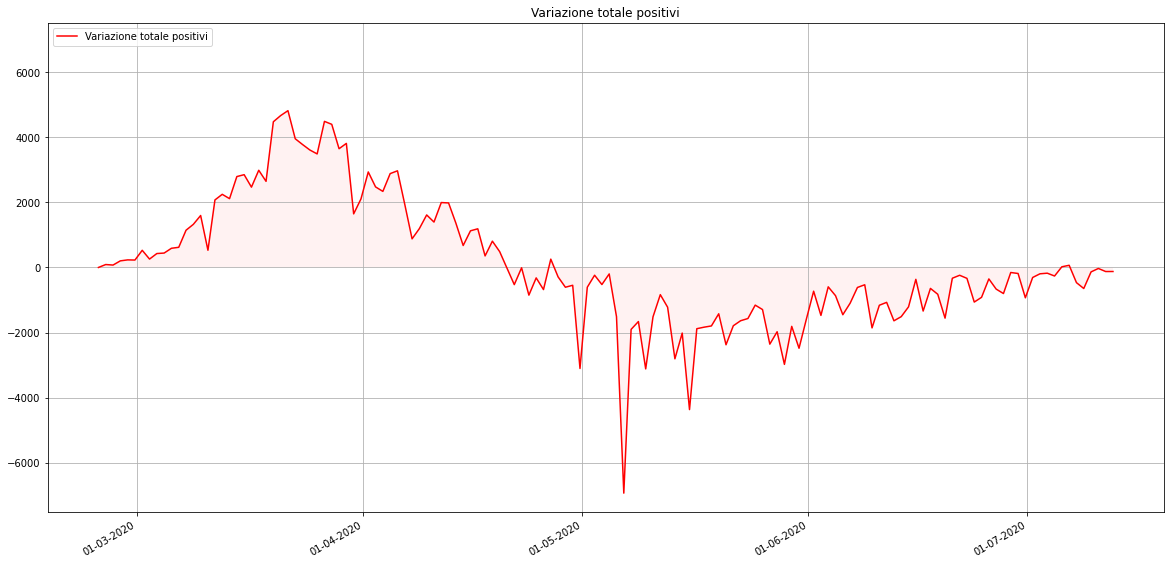

In [10]:
fig = plt.figure(figsize=(20, 10))
x_axis = conf_df['data'].apply(lambda x: datetime.strptime(x, FMT))

plt.plot(x_axis, conf_df['variazione_totale_positivi'], color='r', label='Variazione totale positivi')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()  # Rotation
plt.legend(loc='upper left')

yabs_max = abs(max(ax.get_ylim(), key=abs)) # Force zero to the center of y axis 
ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)
ax.fill_between(x_axis, 0, conf_df['variazione_totale_positivi'], facecolor='#fff2f2') # Set color between y and 0'
plt.title('Variazione totale positivi')


plt.grid()
plt.show()

## Analisi mirata su province e regioni
Passiamo adesso all'analisi dei dataset suddivisi per province e regioni utilizzando i due dataset principali:
- **dpc-covid19-ita-province.json**
- **dpc-covid19-ita-regioni.json**.

Importiamo i datasets in questione e mostriamo per ciascuno di essi il relativo contenuto.
### Province

In [11]:
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json"
df_province = pd.read_json(url)
df_province

data stato  codice_regione denominazione_regione  \
0      2020-02-24T18:00:00   ITA              13               Abruzzo   
1      2020-02-24T18:00:00   ITA              13               Abruzzo   
2      2020-02-24T18:00:00   ITA              13               Abruzzo   
3      2020-02-24T18:00:00   ITA              13               Abruzzo   
4      2020-02-24T18:00:00   ITA              13               Abruzzo   
...                    ...   ...             ...                   ...   
18293  2020-07-12T17:00:00   ITA               5                Veneto   
18294  2020-07-12T17:00:00   ITA               5                Veneto   
18295  2020-07-12T17:00:00   ITA               5                Veneto   
18296  2020-07-12T17:00:00   ITA               5                Veneto   
18297  2020-07-12T17:00:00   ITA               5                Veneto   

       codice_provincia               denominazione_provincia sigla_provincia  \
0                    66                              L'Aquila              AQ   
1                    67                                Teramo              TE   
2                    68                               Pescara              PE   
3                    69                                Chieti              CH   
4                   979  In fase di definizione/aggiornamento            None   
...                 ...                                   ...             ...   
18293                27                               Venezia              VE   
18294                28                                Padova              PD   
18295                29                                Rovigo              RO   
18296               899    Fuori Regione / Provincia Autonoma                   
18297               999                In fase di definizione                   

             lat       long  totale_casi  note  
0      42.351222  13.398438            0  None  
1      42.658918  13.704400            0  None  
2      42.464584  14.213648            0  None  
3      42.351032  14.167546            0  None  
4            NaN        NaN            0  None  
...          ...        ...          ...   ...  
18293  45.434905  12.338452         2699        
18294  45.406930  11.876087         3985        
18295  45.071073  11.790070          445        
18296        NaN        NaN          331        
18297        NaN        NaN           22        

[18298 rows x 11 columns]

Il dataset **dpc-covid19-ita-province.json** elenca, per ogni provincia, informazioni riguardanti sia la regione (come il codice, la denominazione, la longitudine e la latitudine), sia la data relativa alla rilevazione dei dati. Questi ultimi riguardano in particolare il numero di pazienti affetti da Covid-19.

### Regioni

In [12]:
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-regioni.json"
df_regioni = pd.read_json(url)
df_regioni

data stato  codice_regione denominazione_regione  \
0     2020-02-24T18:00:00   ITA              13               Abruzzo   
1     2020-02-24T18:00:00   ITA              17            Basilicata   
2     2020-02-24T18:00:00   ITA              18              Calabria   
3     2020-02-24T18:00:00   ITA              15              Campania   
4     2020-02-24T18:00:00   ITA               8        Emilia-Romagna   
...                   ...   ...             ...                   ...   
2935  2020-07-12T17:00:00   ITA              19               Sicilia   
2936  2020-07-12T17:00:00   ITA               9               Toscana   
2937  2020-07-12T17:00:00   ITA              10                Umbria   
2938  2020-07-12T17:00:00   ITA               2         Valle d'Aosta   
2939  2020-07-12T17:00:00   ITA               5                Veneto   

            lat       long  ricoverati_con_sintomi  terapia_intensiva  \
0     42.351222  13.398438                       0                  0   
1     40.639471  15.805148                       0                  0   
2     38.905976  16.594402                       0                  0   
3     40.839566  14.250850                       0                  0   
4     44.494367  11.341721                      10                  2   
...         ...        ...                     ...                ...   
2935  38.115697  13.362357                       5                  0   
2936  43.769231  11.255889                       8                  3   
2937  43.106758  12.388247                       4                  0   
2938  45.737503   7.320149                       2                  0   
2939  45.434905  12.338452                      20                  3   

      totale_ospedalizzati  isolamento_domiciliare  ...  \
0                        0                       0  ...   
1                        0                       0  ...   
2                        0                       0  ...   
3                        0                       0  ...   
4                       12                       6  ...   
...                    ...                     ...  ...   
2935                     5                     118  ...   
2936                    11                     320  ...   
2937                     4                       5  ...   
2938                     2                       1  ...   
2939                    23                     385  ...   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  deceduti  \
0                              0               0                0         0   
1                              0               0                0         0   
2                              0               0                0         0   
3                              0               0                0         0   
4                              0              18                0         0   
...                          ...             ...              ...       ...   
2935                           0               0             2693       283   
2936                           1               1             8869      1122   
2937                           1               2             1361        80   
2938                           0               0             1047       146   
2939                          10              16            16948      2039   

      casi_da_sospetto_diagnostico  casi_da_screening  totale_casi  tamponi  \
0                              NaN                NaN            0        5   
1                              NaN                NaN            0        0   
2                              NaN                NaN            0        1   
3                              NaN                NaN            0       10   
4                              NaN                NaN           18      148   
...                            ...                ...          ...      ...   
2935                        2749.0              350.0   

Il dataset **dpc-covid19-ita-regioni.json** elenca, per ogni regione, le principali informazioni sulle province (codice, denominazione, sigla, latitudine e longitudine), sulla regione (codice e denominazione) e, infine, fornisce informazioni sul totale dei casi rilevati e la data di rilevazione.

Il dataset sulle regioni contiene quindi più informazioni relative alla malattia da Covid-19, suddividendo i casi in: 

* ricoverati 
* individui in terapia intensiva
* totale degli ospedalizzati 
* soggetti in isolamento domiciliare
* totale positivi (e relativa variazione)
* nuovi positivi
* numero di guariti 
* individui deceduti
* totale casi
* casi da sospetto diagnostico 
* casi da screening
* numero di tamponi effettuati e di casi testati


Il dataset sulle province, invece, riporta solamente il totale dei casi rilevati nella provincia, il che consente comunque di avere un quadro generale sulla diffusione del virus a livello provinciale.

#### Descrizione dei campi all'interno dei Dataframe

Province

In [13]:
df_province.describe(include='all')

data  stato  codice_regione denominazione_regione  \
count                 18298  18298    18298.000000                 18298   
unique                  140      1             NaN                    21   
top     2020-07-03T17:00:00    ITA             NaN             Lombardia   
freq                    149  18298             NaN                  1838   
mean                    NaN    NaN       10.608372                   NaN   
std                     NaN    NaN        6.097295                   NaN   
min                     NaN    NaN        1.000000                   NaN   
25%                     NaN    NaN        5.000000                   NaN   
50%                     NaN    NaN       10.000000                   NaN   
75%                     NaN    NaN       16.000000                   NaN   
max                     NaN    NaN       22.000000                   NaN   

        codice_provincia               denominazione_provincia  \
count       18298.000000                                 18298   
unique               NaN                                   110   
top                  NaN  In fase di definizione/aggiornamento   
freq                 NaN                                  2562   
mean          221.601377                                   NaN   
std           357.190975                                   NaN   
min             1.000000                                   NaN   
25%            33.000000                                   NaN   
50%            66.000000                                   NaN   
75%            99.000000                                   NaN   
max           999.000000                                   NaN   

       sigla_provincia           lat          long   totale_casi  note  
count            15483  14980.000000  14980.000000  18298.000000  1795  
unique             108           NaN           NaN           NaN    14  
top                              NaN           NaN           NaN        
freq               504           NaN           NaN           NaN  1777  
mean               NaN     42.908522     12.096599   1261.039458   NaN  
std                NaN      2.631597      2.660635   2582.834711   NaN  
min                NaN     36.925092      7.320149      0.000000   NaN  
25%                NaN     40.914047      9.828190     50.000000   NaN  
50%                NaN     43.715532     12.104734    380.000000   NaN  
75%                NaN     45.185093     14.167546   1245.000000   NaN  
max                NaN     46.499335     18.171897  24604.000000   NaN

Regioni

In [14]:
df_regioni.describe(include='all')

data stato  codice_regione denominazione_regione  \
count                  2940  2940     2940.000000                  2940   
unique                  140     1             NaN                    21   
top     2020-05-31T17:00:00   ITA             NaN              Calabria   
freq                     21  2940             NaN                   140   
mean                    NaN   NaN       11.857143                   NaN   
std                     NaN   NaN        6.274865                   NaN   
min                     NaN   NaN        1.000000                   NaN   
25%                     NaN   NaN        7.000000                   NaN   
50%                     NaN   NaN       12.000000                   NaN   
75%                     NaN   NaN       17.000000                   NaN   
max                     NaN   NaN       22.000000                   NaN   

                lat         long  ricoverati_con_sintomi  terapia_intensiva  \
count   2940.000000  2940.000000             2940.000000        2940.000000   
unique          NaN          NaN                     NaN                NaN   
top             NaN          NaN                     NaN                NaN   
freq            NaN          NaN                     NaN                NaN   
mean      43.046293    12.225955              555.118367          63.128231   
std        2.489204     2.659400             1473.060804         155.814150   
min       38.115697     7.320149                0.000000           0.000000   
25%       41.125596    11.121231               16.000000           1.000000   
50%       43.616760    12.388247               92.500000          11.000000   
75%       45.434905    13.768136              387.000000          54.000000   
max       46.499335    16.867367            12077.000000        1381.000000   

        totale_ospedalizzati  isolamento_domiciliare  ...  \
count            2940.000000             2940.000000  ...   
unique                   NaN                     NaN  ...   
top                      NaN                     NaN  ...   
freq                     NaN                     NaN  ...   
mean              618.246599             1821.900000  ...   
std              1623.129819             3917.829184  ...   
min                 0.000000                0.000000  ...   
25%                17.000000               75.750000  ...   
50%               106.000000              453.500000  ...   
75%               437.000000             1610.500000  ...   
max             13328.000000            30382.000000  ...   

        variazione_totale_positivi  nuovi_positivi  dimessi_guariti  \
count                  2940.000000     2940.000000      2940.000000   
unique                         NaN             NaN              NaN   
top                            NaN             NaN              NaN   
freq                           NaN             NaN              NaN   
mean                      4.407483       82.686735      4326.136054   
std                     208.676942      223.031549      9587.918429   
min                   -5339.000000     -229.000000         0.000000   
25%                     -20.000000        1.000000        86.000000   
50%                       0.000000       10.000000      1043.500000   
75%                      18.000000       62.000000      3581.000000   
max                    1950.000000     3251.000000     70297.000000   

            deceduti  casi_da_sospetto_diagnostico  casi_da_screening  \
count    2940.000000                    378.000000         378.000000   
unique           NaN                           NaN                NaN   
top              NaN                           NaN                NaN   
freq             NaN                           NaN                NaN   
mean     1082.264626                  10601.179894         890.555556   
std      2795.603285                  19250.426686        1505.060251   
min         0.000000                    400.000000           0.000000   
25%

I due dataset sono connessi tra loro: entrambi analizzano il numero totale di casi, ma a due livelli differenti: regionale e provinciale. Pertanto è possibile creare un nuovo dataframe che mette in relazione i due livelli.

In [15]:
mask = df_province[df_province['denominazione_provincia'] != 'In fase di definizione/aggiornamento']
multiP = mask.groupby(['denominazione_regione', 'denominazione_provincia'])[['codice_regione','codice_provincia','totale_casi']].max()
multiP

codice_regione  \
denominazione_regione denominazione_provincia                              
Abruzzo               Chieti                                          13   
                      Fuori Regione / Provincia Autonoma              13   
                      In fase di definizione                          13   
                      L'Aquila                                        13   
                      Pescara                                         13   
...                                                                  ...   
Veneto                Rovigo                                           5   
                      Treviso                                          5   
                      Venezia                                          5   
                      Verona                                           5   
                      Vicenza                                          5   

                                                          codice_provincia  \
denominazione_regione denominazione_provincia                                
Abruzzo               Chieti                                            69   
                      Fuori Regione / Provincia Autonoma               879   
                      In fase di definizione                           979   
                      L'Aquila                                          66   
                      Pescara                                           68   
...                                                                    ...   
Veneto                Rovigo                                            29   
                      Treviso                                           26   
                      Venezia                                           27   
                      Verona                                            23   
                      Vicenza                                           24   

                                                          totale_casi  
denominazione_regione denominazione_provincia                          
Abruzzo               Chieti                                      832  
                      Fuori Regione / Provincia Autonoma           26  
                      In fase di definizione                        3  
                      L'Aquila                                    247  
                      Pescara                                    1598  
...                                                               ...  
Veneto                Rovigo                                      446  
                      Treviso                                    2697  
                      Venezia                                    2699  
                      Verona                                     5138  
                      Vicenza                                    2878  

[149 rows x 3 columns]

#### Regioni coinvolte nell'analisi

In [16]:
regions = df_regioni.denominazione_regione.unique()
display(Markdown(''.join("- [{}](#{})\n".format(region, re.sub("[ .]", "-", region.lower())) for region in regions)))

- [Abruzzo](#abruzzo)
- [Basilicata](#basilicata)
- [Calabria](#calabria)
- [Campania](#campania)
- [Emilia-Romagna](#emilia-romagna)
- [Friuli Venezia Giulia](#friuli-venezia-giulia)
- [Lazio](#lazio)
- [Liguria](#liguria)
- [Lombardia](#lombardia)
- [Marche](#marche)
- [Molise](#molise)
- [P.A. Bolzano](#p-a--bolzano)
- [P.A. Trento](#p-a--trento)
- [Piemonte](#piemonte)
- [Puglia](#puglia)
- [Sardegna](#sardegna)
- [Sicilia](#sicilia)
- [Toscana](#toscana)
- [Umbria](#umbria)
- [Valle d'Aosta](#valle-d'aosta)
- [Veneto](#veneto)


Possiamo esplorare, per ogni regione, il numero massimo di ciascun campo analizzato (totale ospedalizzati, totale positivi, guariti, deceduti, totale casi,...)

In [17]:
df_regioni.groupby(['denominazione_regione']).agg(['max']).loc[:, 'ricoverati_con_sintomi'::]

ricoverati_con_sintomi terapia_intensiva  \
                                         max               max   
denominazione_regione                                            
Abruzzo                                  361                76   
Basilicata                                65                19   
Calabria                                 183                23   
Campania                                 622               181   
Emilia-Romagna                          3944               375   
Friuli Venezia Giulia                    236                61   
Lazio                                   1468               203   
Liguria                                 1153               179   
Lombardia                              12077              1381   
Marche                                  1001               169   
Molise                                    35                 9   
P.A. Bolzano                             325                65   
P.A. Trento                              360                81   
Piemonte                                3553               453   
Puglia                                   648               159   
Sardegna                                 126                31   
Sicilia                                  568                80   
Toscana                                 1149               297   
Umbria                                   176                48   
Valle d'Aosta                            131                27   
Veneto                                  1718               356   

                      totale_ospedalizzati isolamento_domiciliare  \
                                       max                    max   
denominazione_regione                                               
Abruzzo                                437                   1764   
Basilicata                              76                    209   
Calabria                               200                    696   
Campania                               717                   2449   
Emilia-Romagna                        4310                  10097   
Friuli Venezia Giulia                  296                   1257   
Lazio                                 1607                   2991   
Liguria                               1332                   2883   
Lombardia                            13328                  30382   
Marche                                1168                   2954   
Molise                                  40                    221   
P.A. Bolzano                           389                   1381   
P.A. Trento                            438                   1748   
Piemonte                              3985                  13010   
Puglia                                 780                   2516   
Sardegna                               151                    780   
Sicilia                                637                   1827   
Toscana                               1437                   5618   
Umbria                                 220                    716   
Valle d'Aosta                          147                    474   
Veneto                                2068                   9203   

                      totale_positivi variazione_totale_positivi  \
                                  max                        max   
denominazione_regione                                              
Abruzzo                          2108                        142   
Basilicata                        281                         31   
Calabria                          847                         97   
Campania                         3118                        212   
Emilia-Romagna                  13818                        830   
Friuli Venezia Giulia            1428                        495   
Lazio                            4573                        186   
Liguria                          3598                        202   
Lombardia                       

### Analisi dei casi

In particolare possiamo concentrarci sui casi totali di ogni regione, evidenziandone la media, il valore minimo, il valore massimo e riportando la deviazione standard e i quartili.

In [18]:
df_regioni.groupby('denominazione_regione')['totale_casi'].describe()

count          mean           std    min       25%  \
denominazione_regione                                                       
Abruzzo                140.0   2262.407143   1255.690362    0.0   1332.00   
Basilicata             140.0    288.828571    153.121287    0.0    211.00   
Calabria               140.0    849.678571    442.281906    0.0    638.75   
Campania               140.0   3376.264286   1806.505588    0.0   1903.75   
Emilia-Romagna         140.0  20101.278571  10236.415228   18.0  13428.00   
Friuli Venezia Giulia  140.0   2358.078571   1216.998431    0.0   1495.75   
Lazio                  140.0   5342.792857   3012.930886    3.0   2862.00   
Liguria                140.0   6497.985714   3745.979523    0.0   3181.75   
Lombardia              140.0  63523.107143  32421.536095  172.0  41872.50   
Marche                 140.0   4977.692857   2406.854707    0.0   3652.50   
Molise                 140.0    282.657143    165.956732    0.0    132.25   
P.A. Bolzano           140.0   1908.385714    990.678915    0.0   1297.25   
P.A. Trento            140.0   3154.950000   1754.328539    0.0   1660.00   
Piemonte               140.0  20431.678571  12135.705378    2.0   8585.50   
Puglia                 140.0   3117.207143   1736.626265    0.0   1671.25   
Sardegna               140.0    993.435714    517.009639    0.0    671.00   
Sicilia                140.0   2363.564286   1271.254149    0.0   1531.25   
Toscana                140.0   7201.685714   3843.942309    0.0   4339.50   
Umbria                 140.0   1102.228571    527.072290    0.0   1044.00   
Valle d'Aosta          140.0    864.928571    447.710638    0.0    584.00   
Veneto                 140.0  13820.657143   7094.327547   33.0   8632.50   

                           50%       75%      max  
denominazione_regione                              
Abruzzo                 2998.0   3265.00   3328.0  
Basilicata               382.0    399.00    406.0  
Calabria                1116.0   1159.00   1216.0  
Campania                4491.0   4699.75   4837.0  
Emilia-Romagna         26095.5  27913.00  28940.0  
Friuli Venezia Giulia   3074.0   3283.25   3335.0  
Lazio                   6828.0   7816.00   8314.0  
Liguria                 8385.5   9815.50  10031.0  
Lombardia              77816.5  90243.50  95049.0  
Marche                  6341.0   6745.50   6804.0  
Molise                   301.0    436.00    446.0  
P.A. Bolzano            2538.5   2603.25   2666.0  
P.A. Trento             4252.5   4435.25   4881.0  
Piemonte               27526.0  30858.50  31498.0  
Puglia                  4148.5   4511.25   4541.0  
Sardegna                1317.5   1361.00   1372.0  
Sicilia                 3076.0   3368.00   3464.0  
Toscana                 9582.0  10137.25  10322.0  
Umbria                  1394.0   1432.00   1450.0  
Valle d'Aosta           1142.5   1191.00   1196.0  
Veneto                 18345.5  19184.00  19395.0

Creiamo un pivot table che rappresenta il numero totale dei casi per ogni regione, riportando anche il totale lungo ciascun raggruppamento. In seguito rappresentiamo in un unico grafico l'andamento dei casi totali per ogni regione.

In [19]:
tot_casi = df_regioni.pivot_table('totale_casi', index='data', columns='denominazione_regione')
tot_casi

denominazione_regione  Abruzzo  Basilicata  Calabria  Campania  \
data                                                             
2020-02-24T18:00:00          0           0         0         0   
2020-02-25T18:00:00          0           0         0         0   
2020-02-26T18:00:00          0           0         0         0   
2020-02-27T18:00:00          1           0         0         3   
2020-02-28T18:00:00          1           0         1         4   
...                        ...         ...       ...       ...   
2020-07-08T17:00:00       3310         405      1185      4750   
2020-07-09T17:00:00       3318         405      1185      4755   
2020-07-10T17:00:00       3321         405      1186      4762   
2020-07-11T17:00:00       3323         406      1188      4769   
2020-07-12T17:00:00       3328         406      1216      4772   

denominazione_regione  Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  \
data                                                                           
2020-02-24T18:00:00                18                      0      3        0   
2020-02-25T18:00:00                26                      0      3        1   
2020-02-26T18:00:00                47                      0      3       11   
2020-02-27T18:00:00                97                      0      3       19   
2020-02-28T18:00:00               145                      0      3       19   
...                               ...                    ...    ...      ...   
2020-07-08T17:00:00             28755                   3331   8224    10006   
2020-07-09T17:00:00             28769                   3332   8252    10010   
2020-07-10T17:00:00             28822                   3333   8275    10025   
2020-07-11T17:00:00             28869                   3335   8294    10031   
2020-07-12T17:00:00             28940                   3335   8314    10031   

denominazione_regione  Lombardia  Marche  ...  P.A. Bolzano  P.A. Trento  \
data                                      ...                              
2020-02-24T18:00:00          172       0  ...             0            0   
2020-02-25T18:00:00          240       0  ...             1            0   
2020-02-26T18:00:00          258       1  ...             1            0   
2020-02-27T18:00:00          403       3  ...             1            0   
2020-02-28T18:00:00          531       6  ...             1            0   
...                          ...     ...  ...           ...          ...   
2020-07-08T17:00:00        94651    6794  ...          2650         4876   
2020-07-09T17:00:00        94770    6798  ...          2653         4876   
2020-07-10T17:00:00        94905    6799  ...          2658         4879   
2020-07-11T17:00:00        94972    6803  ...          2661         4881   
2020-07-12T17:00:00        95049    6804  ...          2666         4881   

denominazione_regione  Piemonte  Puglia  Sardegna  Sicilia  Toscana  Umbria  \
data                                                                          
2020-02-24T18:00:00           3       0         0        0        0       0   
2020-02-25T18:00:00           3       0         0        3        2       0   
2020-02-26T18:00:00           3       0         0        3        2       0   
2020-02-27T18:00:00           2       1         0        4        2       0   
2020-02-28T18:00:00          11       3         0        4        8       0   
...                         ...     ...       ...      ...      ...     ...   
2020-07-08T17:00:00       31459    4536      1371     3097    10313    1447   
2020-07-09T17:00:00       31475    4536      1371     3098    10314    1447   
2020-07-10T17:00:00       31485    4540      1372     3098    10316    1448   
2020-07-11T17:00:00       31494    4541      1372     3099    10321    1448   
2020-07-12T17:00:00       31498    4541      1372     3099    10322    1450   

denominazione_regione  Valle d'Aosta  Veneto  
data                                

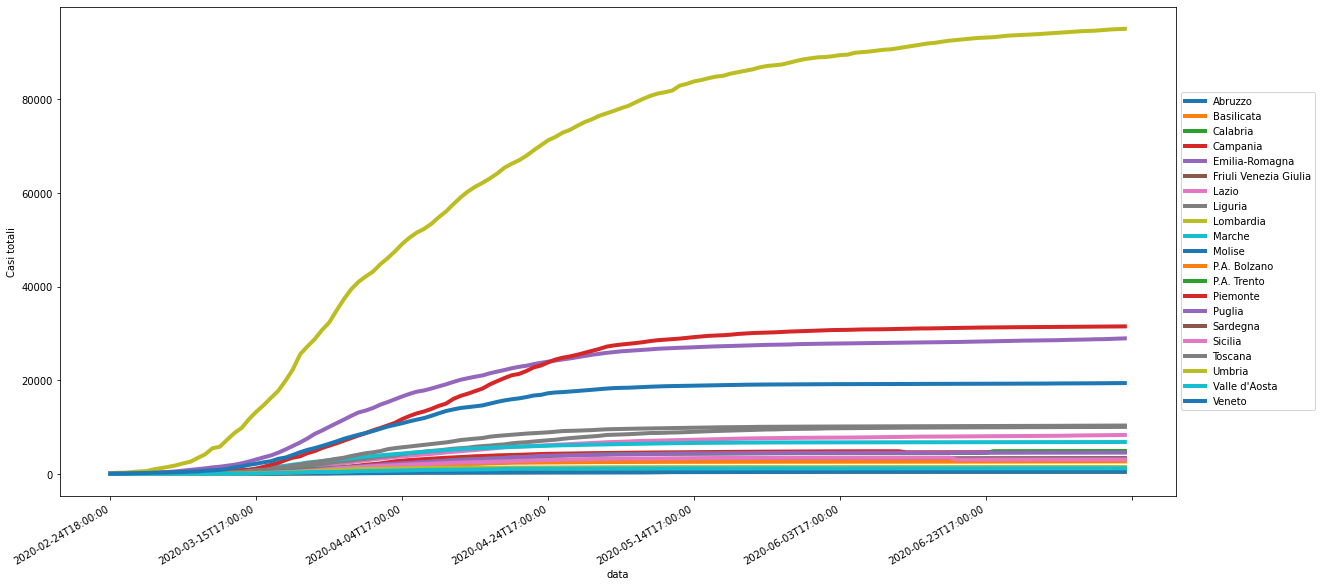

In [20]:
tot_casi.plot(figsize=[20, 10], lw=4)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.gcf().autofmt_xdate()  
plt.ylabel('Casi totali')
plt.show()

Analizziamo i casi totali differenziandoli in base a:
- ricoverati con sintomi
- individui in terapia intensiva
- totale ospedalizzati
- soggetti in isolamento domiciliare

Per ogni regione costruiamo quindi dei grafici che rappresentano l'andamento generale dei pazienti, con riferimento alla suddivisione riportata sopra.

### Abruzzo


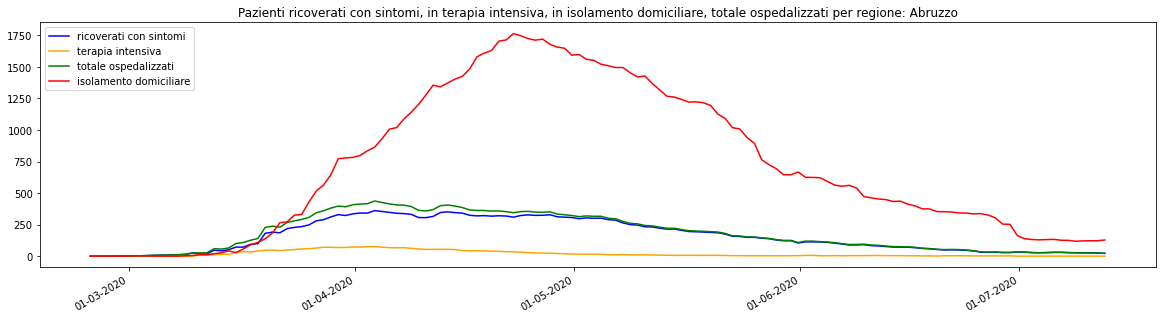

### Basilicata


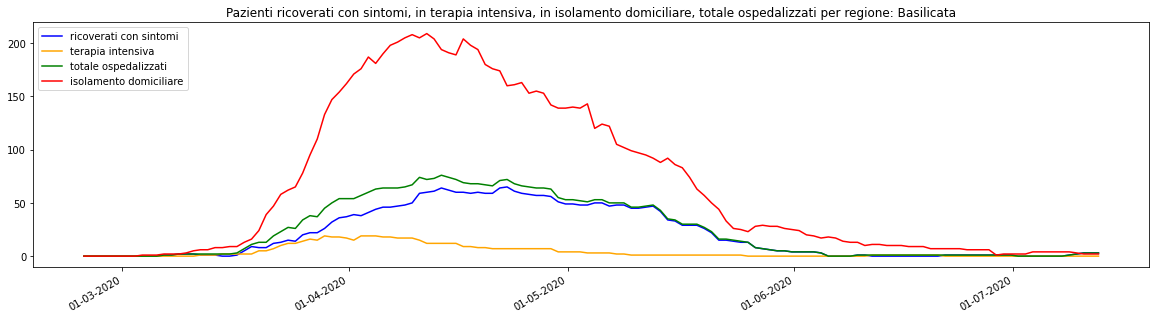

### Calabria


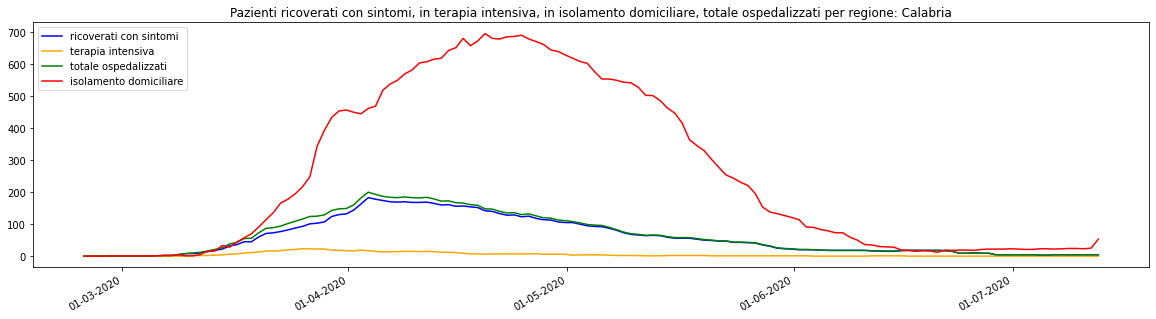

### Campania


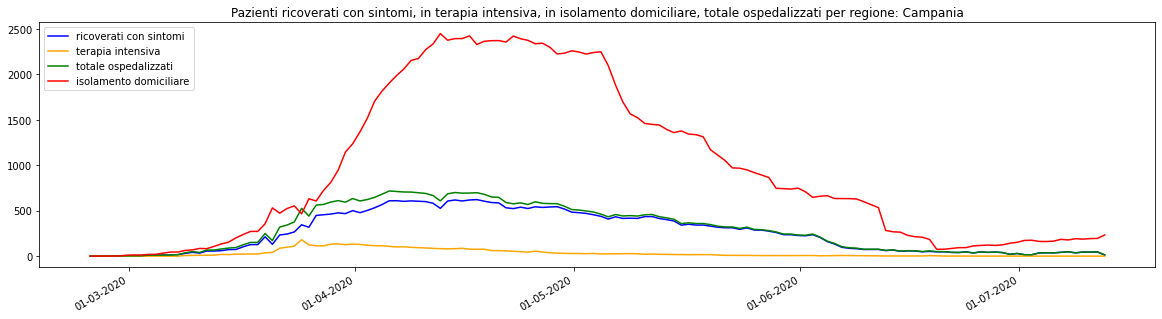

### Emilia-Romagna


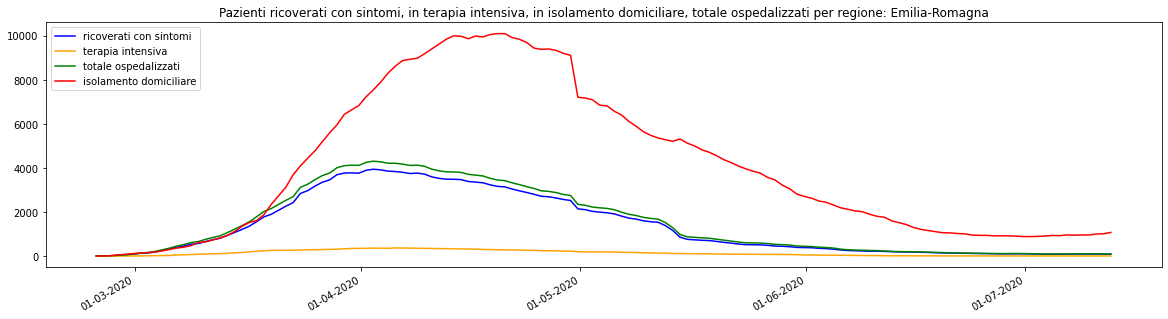

### Friuli Venezia Giulia


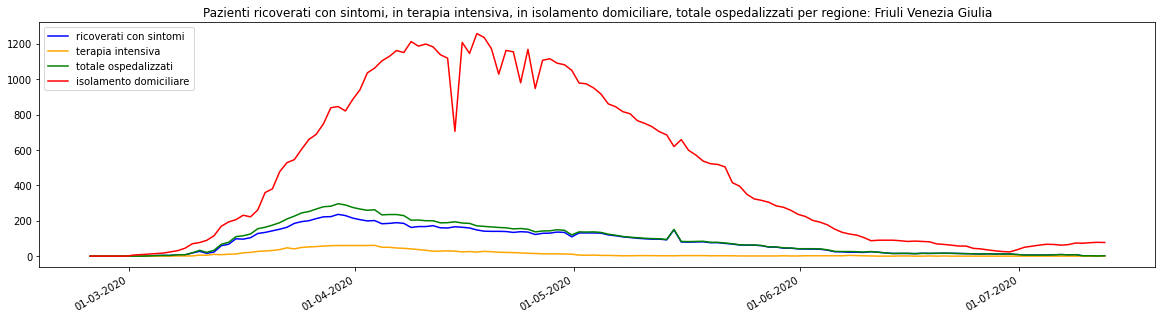

### Lazio


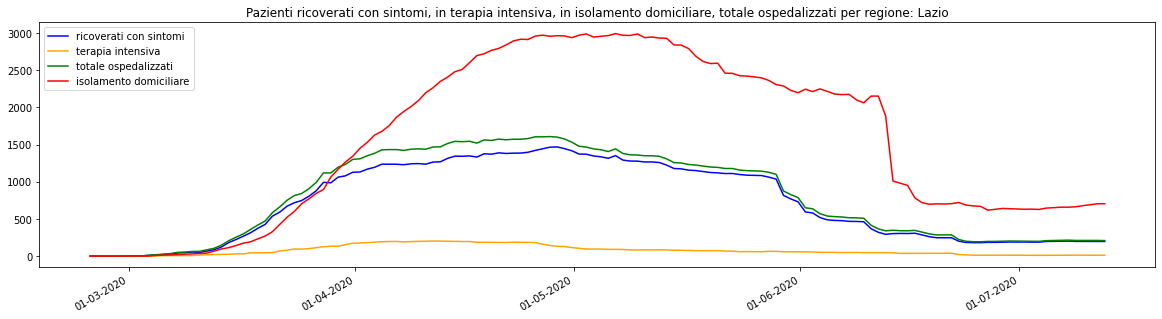

### Liguria


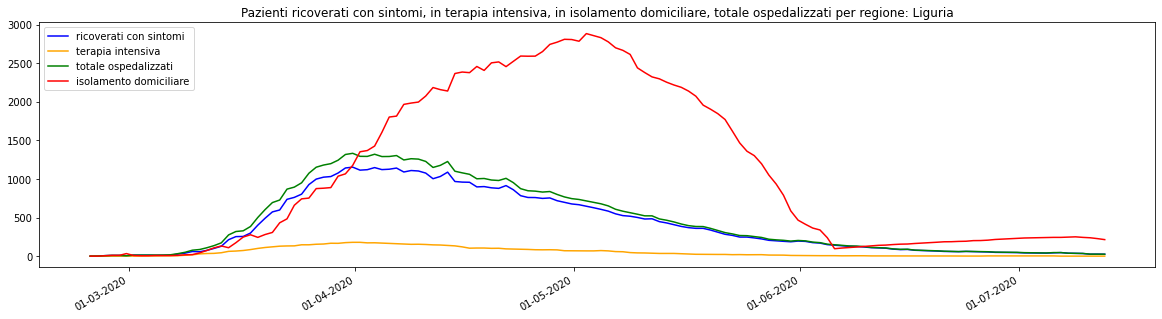

### Lombardia


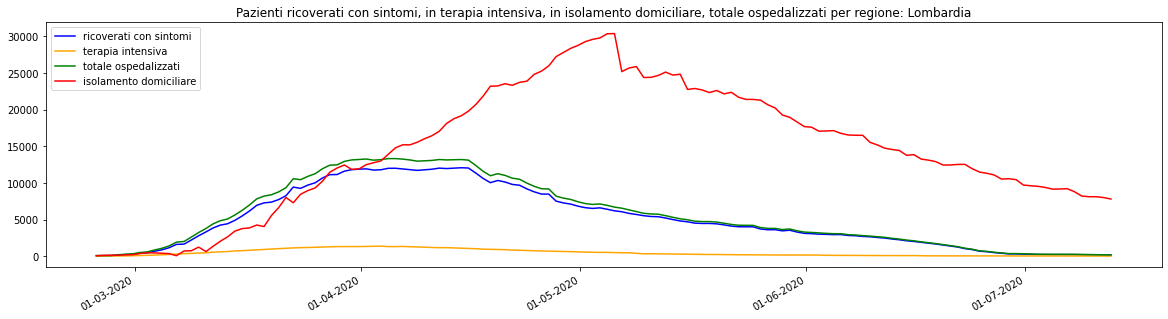

### Marche


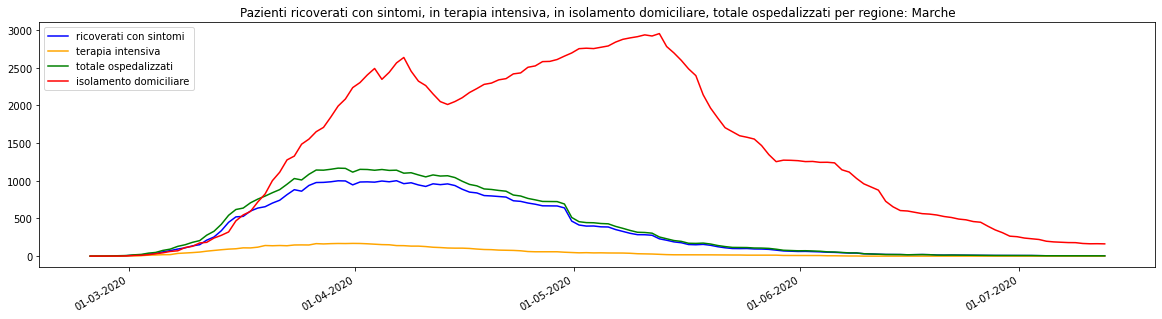

### Molise


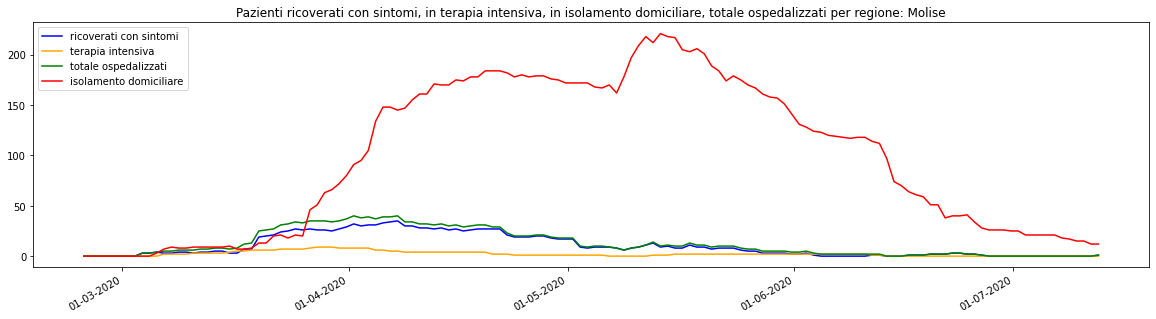

### P.A. Bolzano


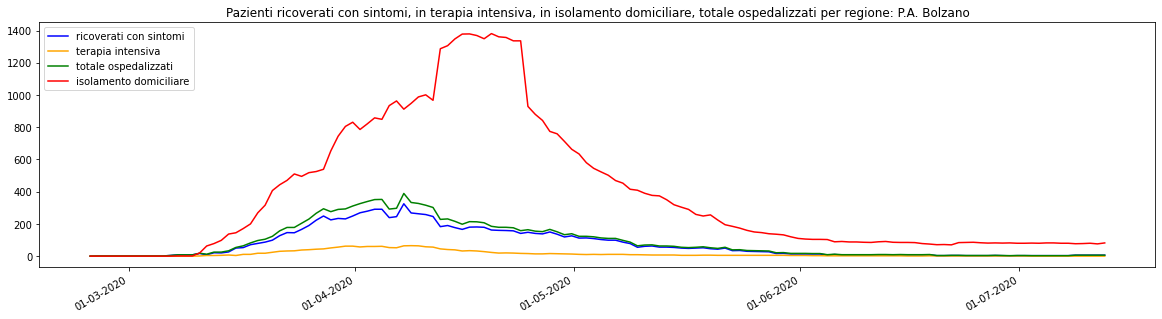

### P.A. Trento


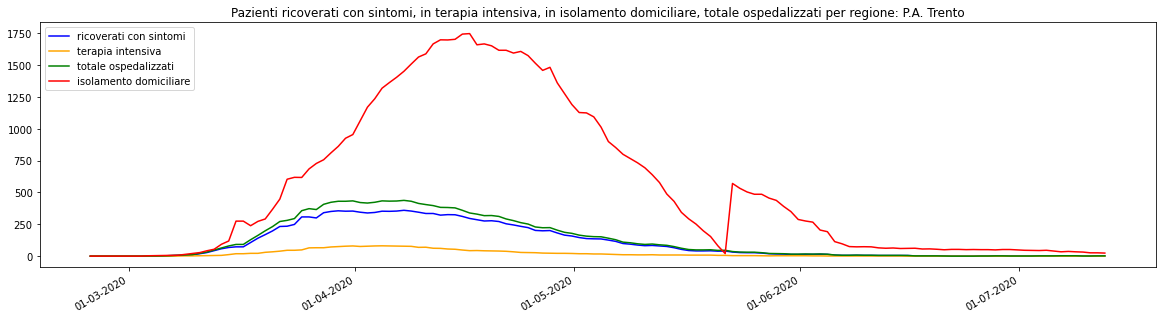

### Piemonte


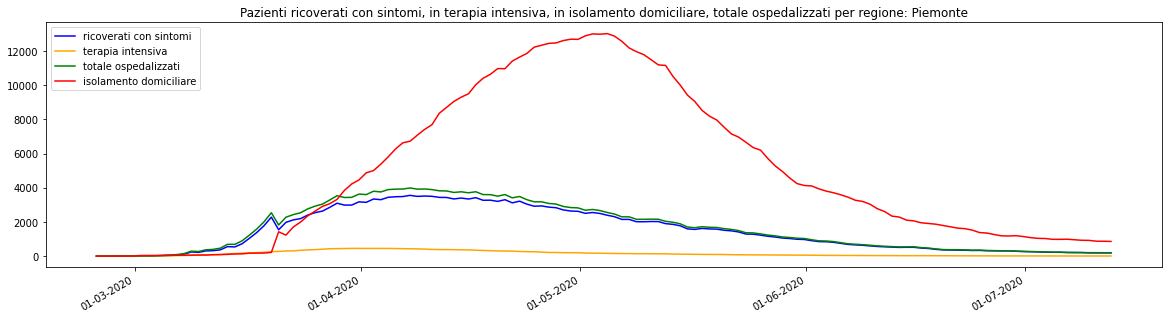

### Puglia


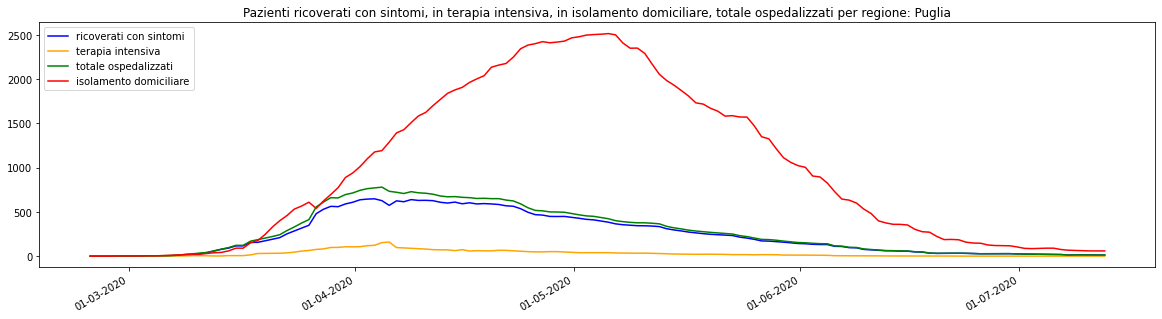

### Sardegna


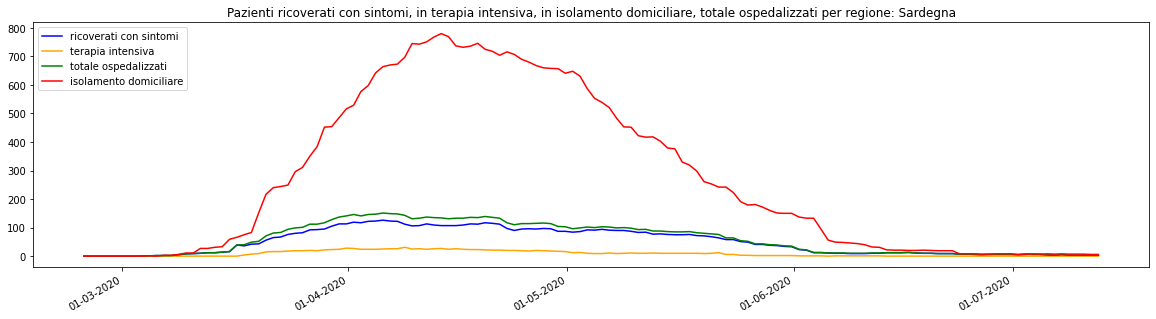

### Sicilia


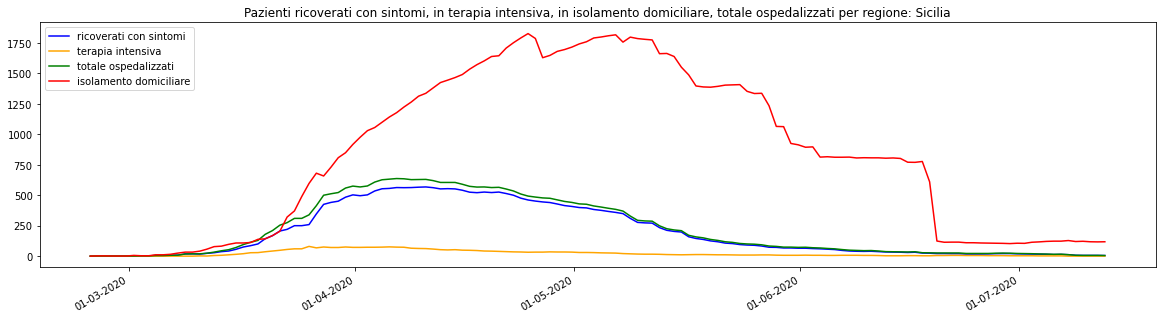

### Toscana


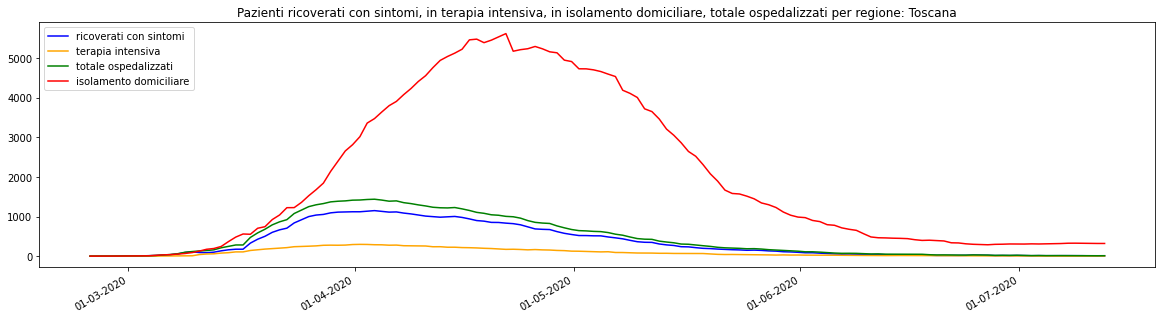

### Umbria


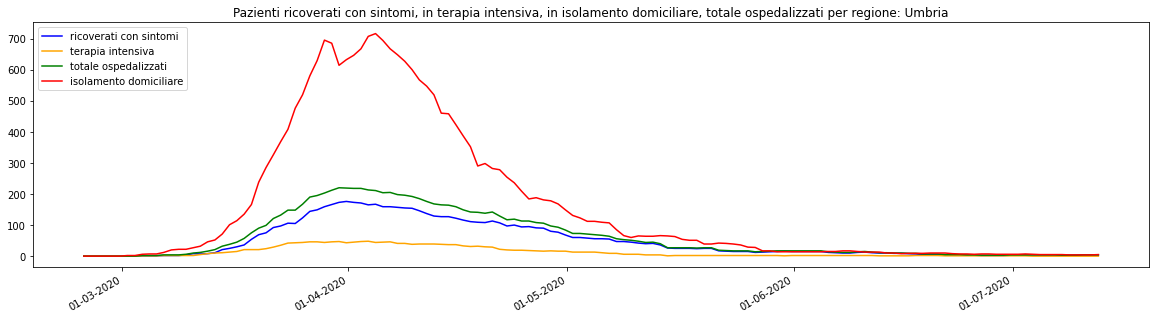

### Valle d'Aosta


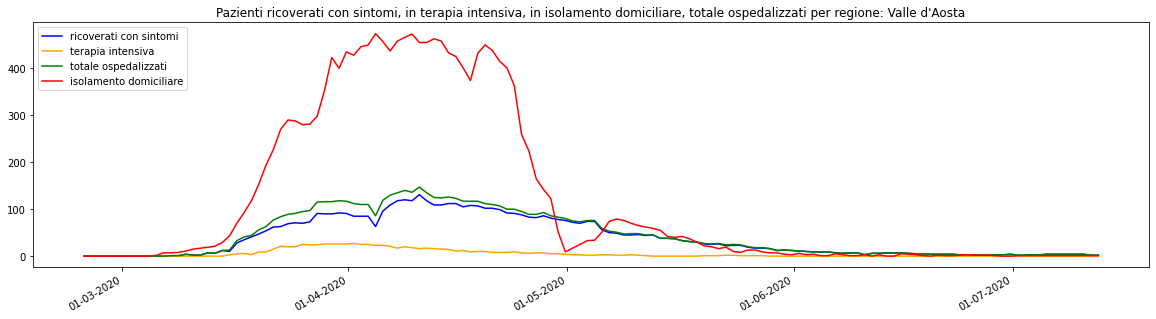

### Veneto


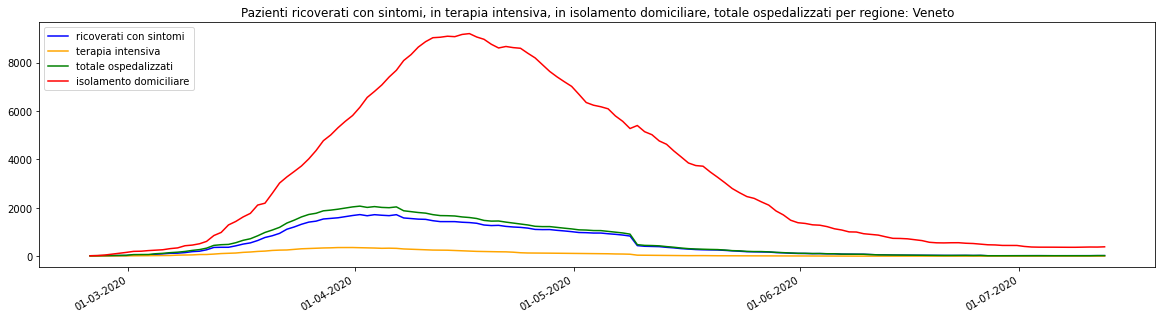

In [21]:
for region in regions:
    display(Markdown("### {}\n".format(region)))
    fig = plt.figure(figsize=(20, 5))
    selected_region = df_regioni.loc[(df_regioni['denominazione_regione'] == region)]
    x_axis = selected_region['data'].apply(lambda x: datetime.strptime(x, FMT))
    plt.title('Pazienti ricoverati con sintomi, in terapia intensiva, in isolamento domiciliare, totale ospedalizzati per regione: ' + region)

    plt.plot(x_axis, selected_region['ricoverati_con_sintomi'], color='blue', label='ricoverati con sintomi')
    plt.plot(x_axis, selected_region['terapia_intensiva'], color='orange', label='terapia intensiva')
    plt.plot(x_axis, selected_region['totale_ospedalizzati'], color='green', label='totale ospedalizzati')
    plt.plot(x_axis, selected_region['isolamento_domiciliare'], color='red', label='isolamento domiciliare')

    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gcf().autofmt_xdate()  # Rotation
    plt.legend(loc='upper left')

    plt.show()

Vi sono alcuni aspetti comuni per ogni regione: il numero di individui in isolamento domiciliare è stato in prevalenza maggiore
rispetto al numero di ricoverati con sintomi o di persone in terapia intensiva. Il numero di individui in isolamento domiciliare si è ridotto in ogni regione, probabilmente grazie ai provvedimenti adottati a livello nazionale.
L'andamento del numero di pazienti ospedalizzati ha seguito per lo più l'andamento del numero di individui ricoverati con sintomi. 

Mentre l'andamento della curva dei contagiati è stato simile tra le varie regioni, il numero dei contagiati si è differenziato molto, come mostra il grafico a barre successivo, che riporta il totale dei casi (suddivisi in ricoverati con sintomi, individui in terapia intensiva, soggetti in isolamento domiciliare e totale ospedalizzati).

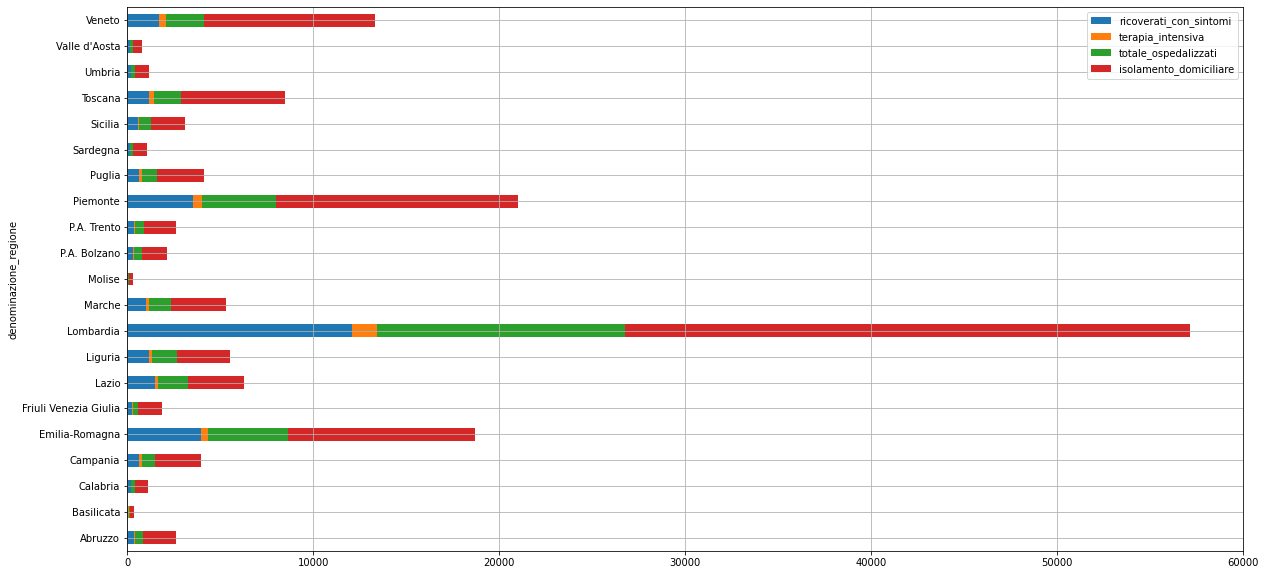

In [22]:
fields = ['ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare']
df_regioni.groupby('denominazione_regione')[fields].max().plot.barh(stacked=True, figsize=[20,10], lw=4, grid=True)

plt.show()

Il grafico successivo mostra sia l'andamento sia l'ammontare di nuovi casi giornalieri. Fra le regioni spicca in particolare la Lombardia, che si differenzia notevolmente per il numero elevato di casi e un calo dei contagi più lento rispetto alle altre regioni.

In [23]:
alt.Chart(df_regioni).mark_circle().encode(
    x='monthdate(data):O',
    y='denominazione_regione',
    color='denominazione_regione',
    size=alt.Size('totale_positivi:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Nuovi casi giornalieri')
    ) 
).properties(
    width=700,
    height=500
)

alt.Chart(...)

Tramite un grafico a barre riportiamo il totale dei casi, il numero di tamponi ed il totale dei casi testati, suddivisi per regione.

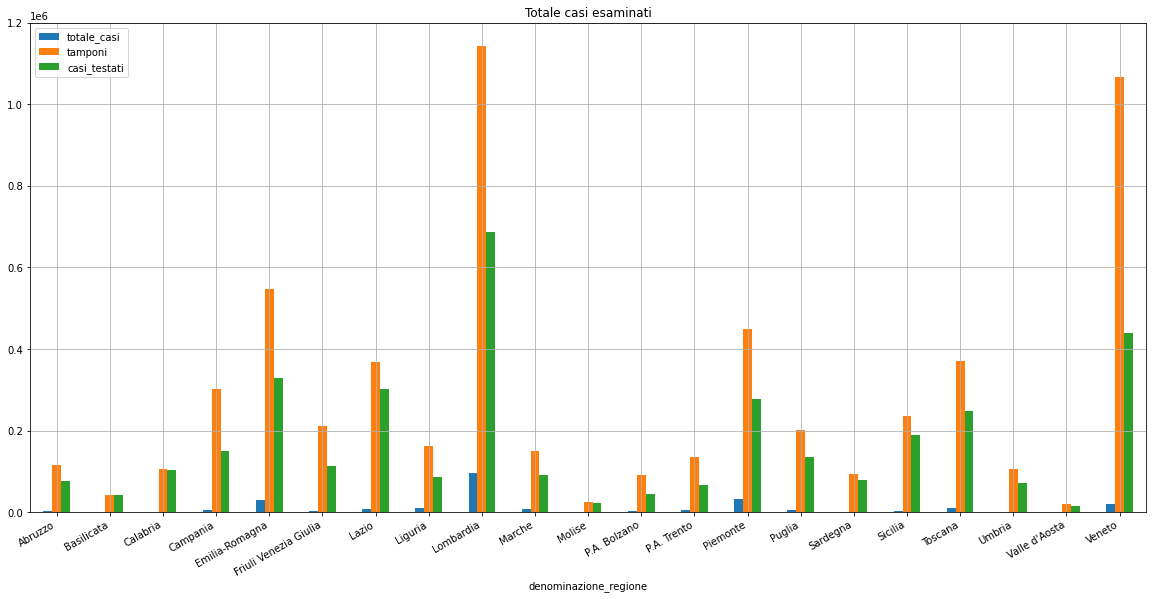

In [24]:
df_regioni.groupby('denominazione_regione')[['totale_casi','tamponi','casi_testati']].max().plot.bar(figsize=[20,10],lw=4, grid=True);
plt.title('Totale casi esaminati')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()  # Rotation
plt.show()

Da esso si ricava che il numero di tamponi effettuati è stato maggiore dei casi totali in ogni regione e il numero più elevato di tamponi è stato effettuato dalle regioni più colpite. 

Possiamo adesso suddividere i casi in:
- casi da screening 
- casi da sospetto diagnostico 

I “casi identificati dal sospetto diagnostico” sono casi positivi al tampone emersi da attività clinica. I “casi identificati da attività di screening” emergono da indagini e test, pianificati a livello nazionale o regionale, che diagnosticano casi positivi al tampone.

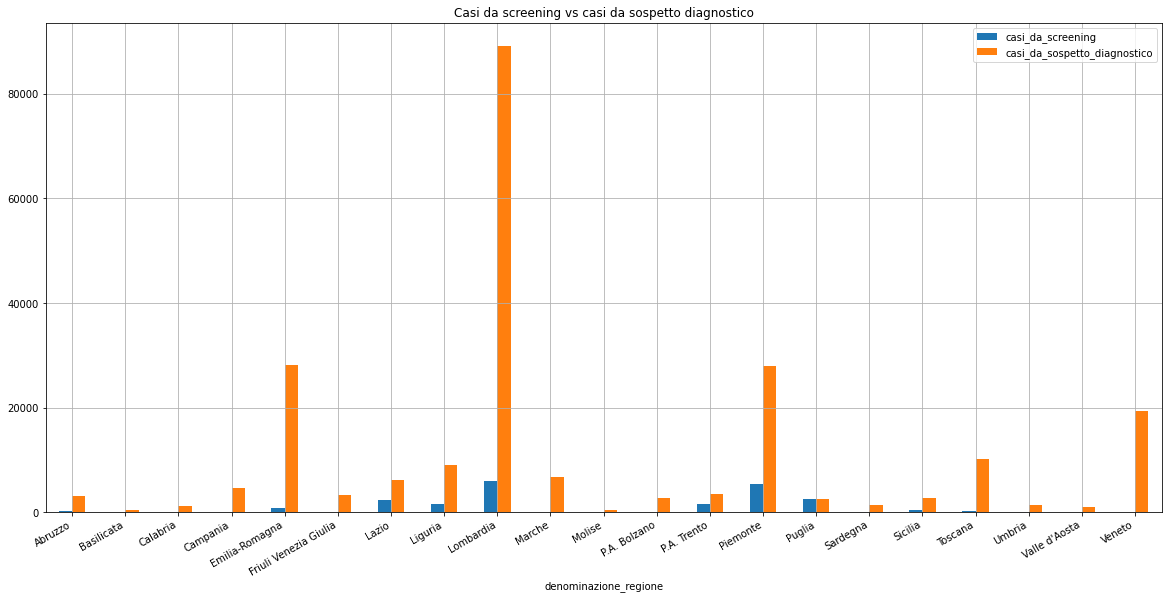

In [25]:
df_regioni.groupby('denominazione_regione')[['casi_da_screening', 'casi_da_sospetto_diagnostico']].max().plot.bar(figsize=[20,10],lw=4, grid=True);
plt.title('Casi da screening vs casi da sospetto diagnostico')
plt.gcf().autofmt_xdate()  # Rotation
plt.show()

Dal grafico notiamo che i casi da sospetto diagnostico superano di gran lunga i casi da screening in ogni regione. Inoltre, in alcune regioni, come Basilicata, Sardegna e Molise, non vi sono stati casi da screening.

Con un grafico a barre, riportiamo per ogni regione il numero totale di decessi registrati e il numero di individui guariti.

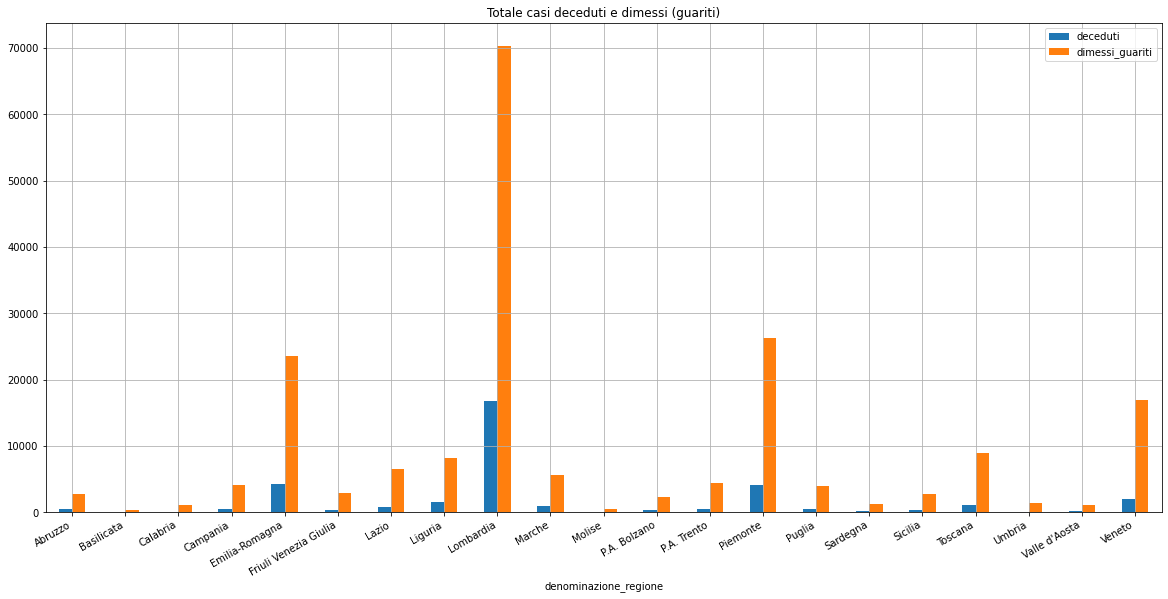

In [26]:
df_regioni.groupby('denominazione_regione')[['deceduti', 'dimessi_guariti']].max().plot.bar(figsize=[20,10],lw=4, grid=True);
plt.title('Totale casi deceduti e dimessi (guariti)')

plt.gcf().autofmt_xdate()  # Rotation
plt.show()

Il numero di individui deceduti si differenzia notevolmente: tra le regioni con più decessi (ma anche con più guariti) vi sono infatti Lombardia (con il numero più elevato), Emilia-Romagna, Veneto e Piemonte. Dal grafico a barre si nota inoltre che il numero di guariti supera di gran lunga quello dei decessi in tutte le regioni.

Possiamo analizzare nello specifico le quattro regioni più colpite a livello di contagi (casi totali) e di decessi, comparando queste quantità con il numero di individui guariti.

In [27]:
Lombardia = df_regioni[df_regioni['denominazione_regione']=='Lombardia']
Veneto = df_regioni[df_regioni['denominazione_regione']=='Veneto']
Piemonte = df_regioni[df_regioni['denominazione_regione']=='Piemonte']
Emilia_romagna = df_regioni[df_regioni['denominazione_regione']=='Emilia-Romagna']
regioni_contagi=pd.concat([Lombardia, Veneto, Piemonte, Emilia_romagna])
regioni_contagi.groupby('denominazione_regione')[['totale_casi','dimessi_guariti','deceduti']].max().sort_values('totale_casi',ascending=False)

totale_casi  dimessi_guariti  deceduti
denominazione_regione                                        
Lombardia                    95049            70297     16748
Piemonte                     31498            26329      4111
Emilia-Romagna               28940            23491      4269
Veneto                       19395            16948      2039

La Lombardia risulta avere il numero più elevato di casi di Covid-19 e di decessi, ma anche il numero più alto di individui guariti. Al secondo posto troviamo il Piemonte, seguito da Emilia-Romagna e Veneto.

Rappresentiamo la distribuzione del numero di soggetti positivi per ogni regione attraverso un box-plot.

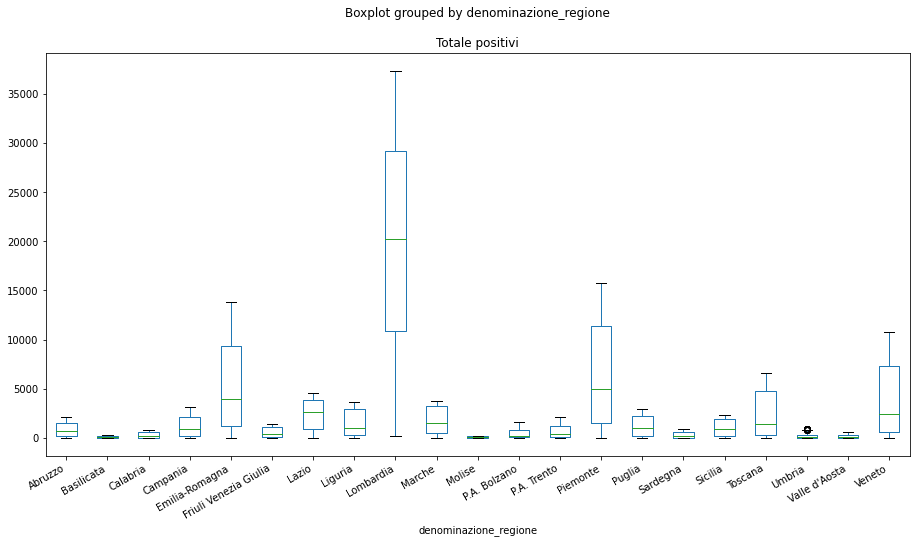

In [28]:
dati = df_regioni['totale_positivi']
df_regioni.boxplot(by='denominazione_regione', column=['totale_positivi'], grid = False, figsize=(15,8));
plt.title('Totale positivi')

plt.gcf().autofmt_xdate()  # Rotation
plt.show()

La distribuzione del numero dei positivi è notevolemente diversa tra una regione e l'altra: cambia il range interquantile, così come la media, la mediana e la simmetria delle distribuzioni.

Rappresentiamo la distribuzione dei positivi attraverso una matrice di dispersione.

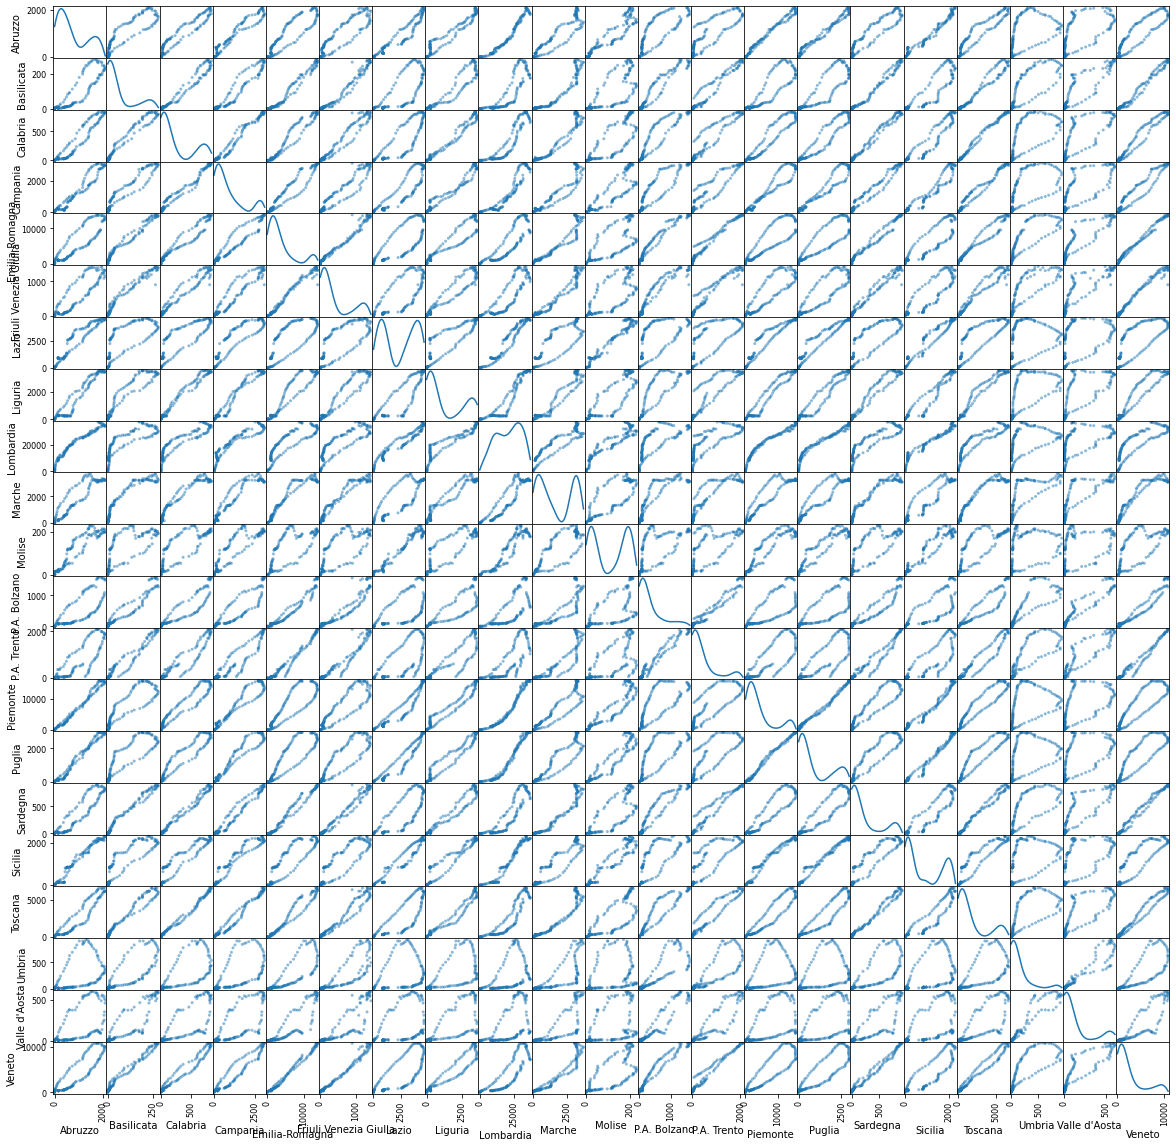

In [29]:
shape = len(df_regioni['totale_positivi']) // len(regions)
x = np.array(dati).reshape(shape, len(regions))
df_positivi = pd.DataFrame(x, columns=regions)

scatter_matrix(df_positivi, alpha=0.5, figsize=(20, 20), diagonal='kde');

Dalla matrice di dispersione risulta che le regioni sono legate da una forte relazione per quanto riguarda il numero di individui positivi. Ciò è legato soprattutto al fatto che le regioni sono caratterizzate da un'elevata mobilità (che spiega la diffusione del contagio), ma anche da uno stesso quadro normativo che ha portato ad un'omogeneità dei provvedimenti adottati (il che spiega la riduzione "contemporanea" dei contagi in ciascuna regione).

## Conclusioni

In questo documento abbiamo interpretato ed analizzato i dati sull'emergenza nazionale COVID-19 forniti dal Dipartimento della Protezione Civile alla seguente pagina web https://github.com/pcm-dpc/COVID-19.

L'analisi è stata effettuata principalmente mediante l'utilizzo dei moduli `pandas`, `numpy` e `matplotlib`. 

Ogni sezione riporta una breve descrizione grafica e testuale delle operazioni effettuate sui dati a disposizione.

Di seguito si riporta un riassunto grafico riguardante l'andamento attuale dell'emergenza in Italia 

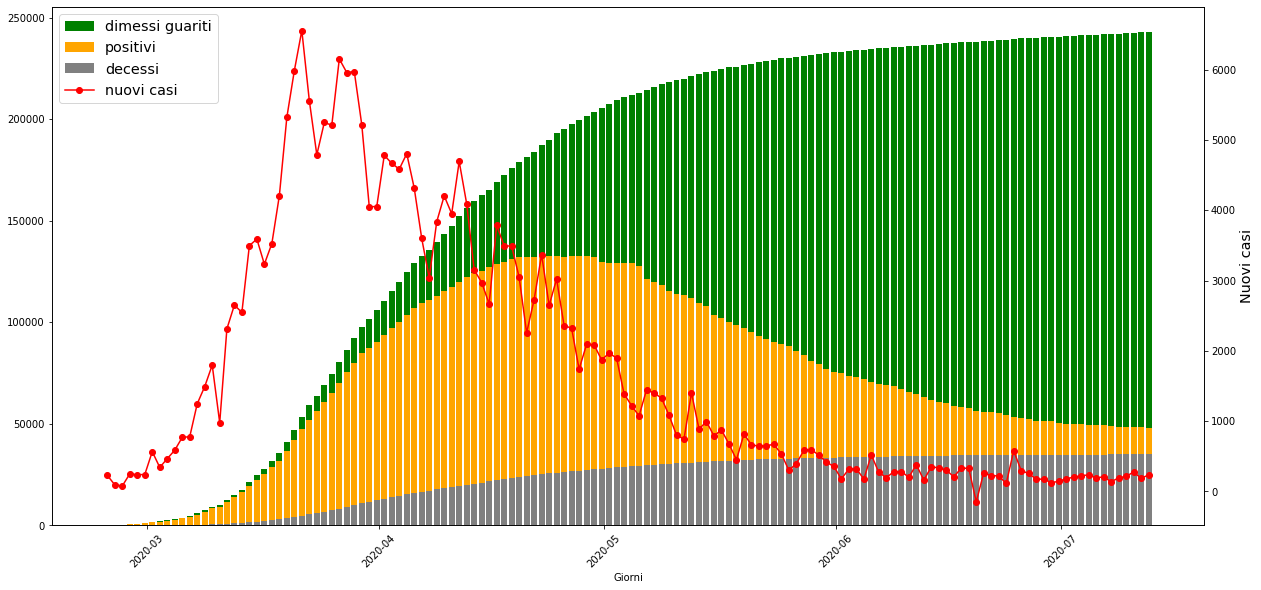

In [30]:
def create_figure():
    fig = plt.figure()
    fig.set_size_inches(20, 8)
    ax = fig.add_axes([0.1, 0.2, 0.8, 0.9]) 
    plt.xticks(rotation=45)
    return ax

# nuovi casi
totale_casi = conf_df["totale_casi"].values
delta_totale_casi = [totale_casi[0]]
for g in range(len(totale_casi) - 1):
    delta_totale_casi += [totale_casi[g+1] - totale_casi[g]]
        
giorni = conf_df['data'].apply(lambda x: datetime.strptime(x, FMT))

ax = create_figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax.set_xlabel('Giorni')

bar3 = ax.bar(giorni, conf_df['deceduti'],  label='decessi', color='gray')
bar2 = ax.bar(giorni, conf_df['totale_positivi'], bottom= conf_df['deceduti'], label='positivi', color='orange')
bar1 = ax.bar(giorni, conf_df['dimessi_guariti'], bottom = conf_df['totale_positivi'] + conf_df['deceduti'], label='dimessi guariti', color='green')

ax2 = ax.twinx()
line1 = ax2.plot(giorni, delta_totale_casi, label="nuovi casi", color="red", marker="o", linestyle="-")
ax2.set_ylabel('Nuovi casi', fontsize="x-large")

arr = [bar1, bar2, bar3]+line1
labs = [a.get_label() for a in arr]
ax.legend(arr, labs, fontsize='x-large')

plt.show()